<a href="https://colab.research.google.com/github/jasen8651/python001/blob/master/python_24_2020%EB%85%84_%EC%9D%B8%EA%B5%AC%EC%B4%9D%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Matplotlib 의 그래프 한글처리 - colab 
 - 아래 내용 설치후 - 메뉴에서  런타임-런타임 다시 시작  
 ex)  
   plt.rc('font', family='NanumBarunGothic')   
   plt.title('제목')  
  plt.plot([1,2,3,4]) 


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,124 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

https://kosis.kr/index/index.do

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 0: invalid continuation byte  
df_kosis = pd.read_csv('data_crowing/행정구역_시군구_별__성별_인구수_2020.csv' )

In [ ]:
df_kosis = pd.read_csv('data_crowing/행정구역_시군구_별__성별_인구수_2020.csv', encoding='cp949' )
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [ ]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
# 0번째 인덱스의 row 제거(행정구역(시군구)별	총인구수 (명)	남자인구수 (명)	여자인구수 (명))
df = df_kosis[df_kosis['행정구역(시군구)별'] != '행정구역(시군구)별'].copy()
#  전국 row 제거 : 전국	51829023	25841029	25987994
df = df[df['행정구역(시군구)별'] != '전국'].copy()
df['행정구역(시군구)별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [ ]:
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [ ]:
df['2020'] = [ int(i)  for i in  df['2020'] ]

In [ ]:
# df = df[['행정구역(시군구)별','2020']]
#df = df.iloc[:,0:2]   # df.iloc[:, [0, 1]]
df = df.loc[:,'행정구역(시군구)별':'2020']
df

,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 408.0+ bytes


In [ ]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_

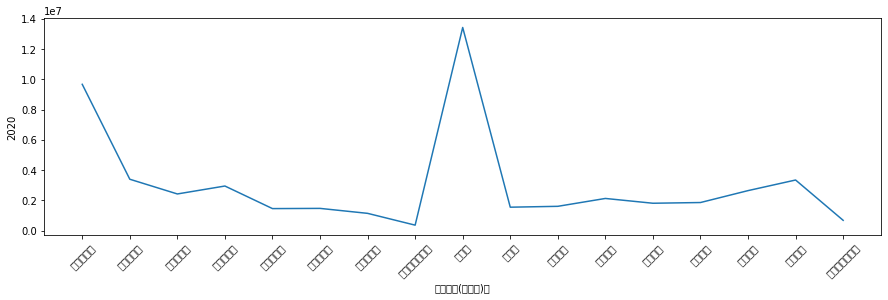

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.lineplot(data=df, x='행정구역(시군구)별', y='2020')

## population_kosis_1997_2019.csv


In [ ]:
df_kosis = pd.read_csv('pdsample/population_kosis_1997_2019.csv', encoding='cp949')
df_kosis

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11602,25613,12989,12624,23727,12097,11630,21228,11023,10205
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2066,4513,2337,2176,4170,2128,2042,3670,1953,1717
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,642,1430,717,713,1321,683,638,1240,671,569
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,514,1150,600,550,1100,585,515,942,488,454
5,인천광역시,3646,1878,1768,3193,1646,1547,3466,1789,1677,...,674,1560,799,761,1417,758,659,1299,662,637
6,광주광역시,2166,1106,1060,1910,985,925,2013,1030,983,...,331,733,375,358,668,325,343,568,291,277
7,대전광역시,2003,1055,948,1869,927,942,1894,947,947,...,322,683,337,346,634,314,320,599,312,287
8,울산광역시,1754,935,819,1569,838,731,1771,946,825,...,277,661,334,327,591,302,289,532,249,283
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,140,322,168,154,310,153,157,274,160,114


In [ ]:
df_kosis.shape

(19, 829)

In [ ]:
# 모든 컬럼들이 보이도록 설정한다.
pd.options.display.max_columns=829

In [ ]:
df_kosis.head(3)

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 

In [ ]:
df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
...,...,...,...
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646


In [ ]:
df.shape

(15732, 3)

In [ ]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df[df['시군구별']=='시군구별']

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
19,시군구별,1997. 01.1,남자 (명)
38,시군구별,1997. 01.2,여자 (명)
57,시군구별,1997. 02,계 (명)
76,시군구별,1997. 02.1,남자 (명)
...,...,...,...
15637,시군구별,2019. 11.1,남자 (명)
15656,시군구별,2019. 11.2,여자 (명)
15675,시군구별,2019. 12,계 (명)
15694,시군구별,2019. 12.1,남자 (명)


In [ ]:
# '시군구별' 이 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
...,...,...,...
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646


In [ ]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.head()

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646


In [ ]:
df.tail()

,시군구별,variable,value
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646
15731,제주특별자치도,2019. 12.2,182


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
dtypes: object(3)
memory usage: 465.8+ KB


In [ ]:
#Series 으로 리턴
print(type(df['variable'])) # Series
#print(df['variable'])
print(type(df['variable'].str)) #StringMethods
print(df['variable'].str.split('.')[1][0])
print(df['variable'].str.split('.')[1][1])
print(type(df['variable'].str.split('.')))
print(df['variable'].str.split('.'))

# DataFrame으로 리턴
print(type(df['variable'].str.split('.', expand=True)))
print(df['variable'].str.split('.', expand=True))

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>
1997
 01
<class 'pandas.core.series.Series'>
1           [1997,  01]
2           [1997,  01]
3           [1997,  01]
4           [1997,  01]
5           [1997,  01]
              ...      
15727    [2019,  12, 2]
15728    [2019,  12, 2]
15729    [2019,  12, 2]
15730    [2019,  12, 2]
15731    [2019,  12, 2]
Name: variable, Length: 14904, dtype: object
<class 'pandas.core.frame.DataFrame'>
          0    1     2
1      1997   01  None
2      1997   01  None
3      1997   01  None
4      1997   01  None
5      1997   01  None
...     ...  ...   ...
15727  2019   12     2
15728  2019   12     2
15729  2019   12     2
15730  2019   12     2
15731  2019   12     2

[14904 rows x 3 columns]


In [ ]:
df['연도'] = df['variable'].str.split('.', expand=True)[0]
df['월'] = df['variable'].str.split('.', expand=True)[1]
df['성별'] = df['variable'].str.split('.', expand=True)[2]


In [ ]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [ ]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,2
15728,전라남도,2019. 12.2,353,2019,12,2
15729,경상북도,2019. 12.2,455,2019,12,2
15730,경상남도,2019. 12.2,646,2019,12,2
15731,제주특별자치도,2019. 12.2,182,2019,12,2


In [ ]:
# 모든 데이터 타입이 object이다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
 3   연도        14904 non-null  object
 4   월         14904 non-null  object
 5   성별        9936 non-null   object
dtypes: object(6)
memory usage: 1.3+ MB


In [ ]:
# 성별에 None이 포함되여 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [ ]:
# None아닌 unique 갯수만 반환한다.
df['성별'].nunique()

2

In [ ]:
# '성별'에서 'None'을 '전체'로 바꾸어 준다
df['성별'] = df['성별'].fillna('전체')

In [ ]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [ ]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,2
15728,전라남도,2019. 12.2,353,2019,12,2
15729,경상북도,2019. 12.2,455,2019,12,2
15730,경상남도,2019. 12.2,646,2019,12,2
15731,제주특별자치도,2019. 12.2,182,2019,12,2


In [ ]:
df['성별'].unique()

array(['전체', '1', '2'], dtype=object)

In [ ]:
df['성별'] = df['성별'].replace('1', '남').replace('2', '여')
df['성별'].unique()

array(['전체', '남', '여'], dtype=object)

In [ ]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [ ]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,여
15728,전라남도,2019. 12.2,353,2019,12,여
15729,경상북도,2019. 12.2,455,2019,12,여
15730,경상남도,2019. 12.2,646,2019,12,여
15731,제주특별자치도,2019. 12.2,182,2019,12,여


In [ ]:
# Series에만 사용할 수 있다
# 빈도수를 계산한다.
df['성별'].value_counts()

전체    4968
남     4968
여     4968
Name: 성별, dtype: int64

In [ ]:
df = df.rename(columns={'variable':'기간', 'value':'출생아수'})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [ ]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '160', '2986', '10205'],
      dtype=object)

In [ ]:
# '출생아수' 컬럼에서 '-'을 찾기 위한 작업
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
5440,광주광역시,2004. 12.1,548,2004,12,남
843,대전광역시,1998. 03.2,871,1998,03,여
8564,전라북도,2009. 07,1217,2009,07,전체
11102,광주광역시,2013. 03.2,552,2013,03,여
5376,제주특별자치도,2004. 11,449,2004,11,전체
2623,전국,2000. 11,52403,2000,11,전체
6504,광주광역시,2006. 07,1031,2006,07,전체
12637,서울특별시,2015. 06.2,3367,2015,06,여
6515,경상남도,2006. 07,2334,2006,07,전체
15518,전라북도,2019. 09,739,2019,09,전체


In [ ]:
df['출생아수']  = df['출생아수'].replace('-', np.nan)

In [ ]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
9726,경상남도,2011. 03.1,1580,2011,03,남
14625,전라북도,2018. 05.1,424,2018,05,남
1876,전라북도,1999. 09.2,982,1999,09,여
7667,경기도,2008. 03.1,5510,2008,03,남
6815,충청남도,2006. 12.1,773,2006,12,남
4042,전라북도,2002. 11.2,650,2002,11,여
11099,부산광역시,2013. 03.2,1125,2013,03,여
41,부산광역시,1997. 01.2,1941,1997,01,여
14355,경기도,2017. 12.2,3262,2017,12,여
852,경상북도,1998. 03.2,1540,1998,03,여


In [ ]:
# '출생아수'의 데이터 타입을 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    14904 non-null  object
 1   기간      14904 non-null  object
 2   출생아수    14364 non-null  object
 3   연도      14904 non-null  object
 4   월       14904 non-null  object
 5   성별      14904 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [ ]:
df['출생아수'].astype(int)

ValueError: ignored

In [ ]:
df['출생아수'] = df['출생아수'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    14904 non-null  object 
 1   기간      14904 non-null  object 
 2   출생아수    14364 non-null  float64
 3   연도      14904 non-null  object 
 4   월       14904 non-null  object 
 5   성별      14904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
4550,세종특별자치시,2003. 08.2,NaN,2003,08,여
6672,부산광역시,2006. 10,2299.0,2006,10,전체
5457,대구광역시,2004. 12.2,794.0,2004,12,여
14717,강원도,2018. 07,692.0,2018,07,전체
13182,전라남도,2016. 04,1193.0,2016,04,전체
2529,서울특별시,2000. 09.1,5719.0,2000,09,남
4262,광주광역시,2003. 03.2,671.0,2003,03,여
13437,대구광역시,2016. 08.2,766.0,2016,08,여
14614,부산광역시,2018. 05.1,877.0,2018,05,남
14208,전라남도,2017. 10,973.0,2017,10,전체


In [ ]:
df['출생아수'].describe()

count    14364.000000
mean      3072.798942
std       6683.035581
min         30.000000
25%        638.000000
50%       1045.000000
75%       1947.000000
max      63268.000000
Name: 출생아수, dtype: float64

#### 전국별 성별 전체

In [ ]:
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체


In [ ]:
df_all = df[(df['시군구별']=='전국') & (df['성별']=='전체')]
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())
#df_all

['전국']
['전체']


In [ ]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체


In [ ]:
df_all.tail()

In [ ]:
#### pandas을 통한 시각화

In [ ]:
df_all.set_index(['연도', '월']).plot(figsize=(15, 4))

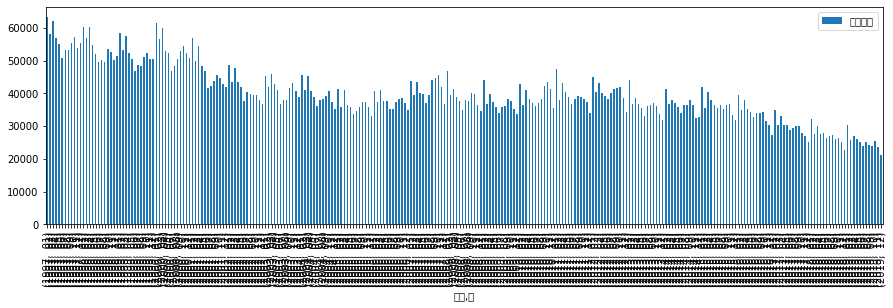

In [ ]:
# 막대그래프는 x축에 연도, 월을 모두 표현한다.
#df_all.set_index(['연도','월']).plot(kind='bar', figsize=(15, 4))
df_all.set_index(['연도','월']).plot.bar(figsize=(15, 4))

In [ ]:
df_all[].set_index(['연도','월']).plot(kind='bar', figsize=(15, 4))

In [ ]:
df_all[-24:]

In [ ]:
df_all[-24:]['연도'].unique()

array(['2018', '2019'], dtype=object)

In [ ]:
# 최근 2년 (24개만) 가져와서 그래프로 그려준다.
df_all[-24:].set_index(['연도','월']).plot(kind='bar', figsize=(15, 4))

In [ ]:
#seaborn 시각화
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체


In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')


In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')

In [ ]:
#지역별
df_local = df[df['시군구별'] != '전국'].copy()
df_local

df_local['시군구별'].unique()


array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별')


plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='시군구별')

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='시군구별')
plt.legend(loc= 'center right')

In [ ]:
#전체만 가져오기
df_local = df_local[df['성별']=='전체']
df_local.head()
df_local['성별'].unique()

In [ ]:
df_local_2 = df_local[df_local['시군구별'].isin(['서울특별시', '경기도', '세종특별자치시'])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
9,세종특별자치시,1997. 01,NaN,1997,01,전체
10,경기도,1997. 01,13440.0,1997,01,전체
59,서울특별시,1997. 02,12239.0,1997,02,전체
66,세종특별자치시,1997. 02,NaN,1997,02,전체


In [ ]:
df_local_2['시군구별'].unique()

array(['서울특별시', '세종특별자치시', '경기도'], dtype=object)

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_2, x='연도', y='출생아수', hue='시군구별')

In [ ]:
df_local_3 = df_local_2[df_local_2['시군구별']=='세종특별자치시'].dropna().head()
df_local_3.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012. 01,73.0,2012,01,전체
10326,세종특별자치시,2012. 02,74.0,2012,02,전체
10383,세종특별자치시,2012. 03,92.0,2012,03,전체
10440,세종특별자치시,2012. 04,84.0,2012,04,전체
10497,세종특별자치시,2012. 05,72.0,2012,05,전체


In [ ]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_local_3, x='연도', y='출생아수')